# Plot results for **Newton**'s method

In [13]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [14]:
# Importing the datasets
X_train = pd.read_csv("dataset/X_train.csv")
t_train = pd.read_csv("dataset/t_train.csv")
X_test = pd.read_csv("dataset/X_test.csv")
t_test = pd.read_csv("dataset/t_test.csv")

In [15]:
# Importing the results of the gradient descent algorithm
with open("results/newton_algorithm.json", "r") as json_file:
    results = json.load(json_file)

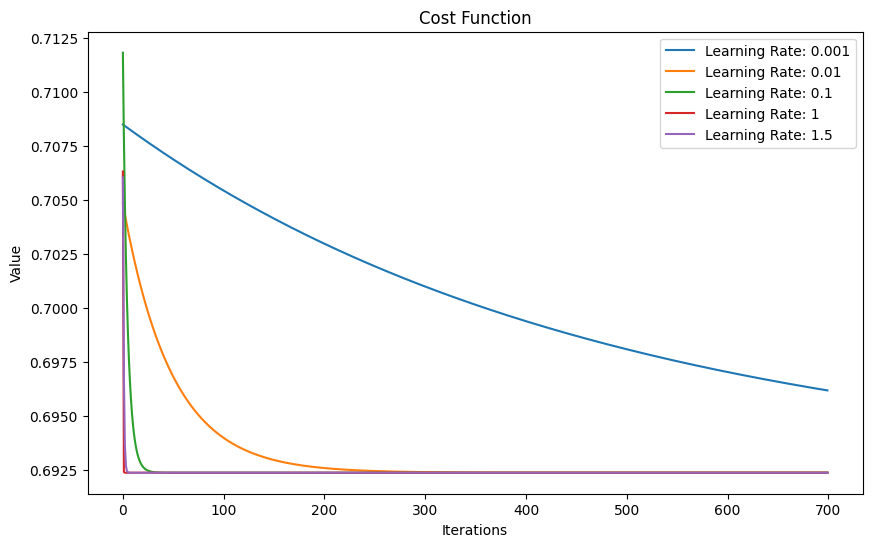

In [16]:
# Extracting the information
learning_rates = [entry["learning_rate"] for entry in results]
cost_function_values = [entry["cost_function_values"] for entry in results]

# Array di iterazioni
x = np.array(range(len(cost_function_values[0])))

plt.figure(figsize=(10, 6))

# Plot for each learning rate
for i, lr in enumerate(learning_rates):
    plt.plot(x, cost_function_values[i], label=f"Learning Rate: {lr}")

plt.title("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.legend()
plt.show()

In [17]:
# Selecting the best learning rate with the lowest cost function value
best_learning_rate = learning_rates[np.argmin([entry[-1] for entry in cost_function_values])]
print(f"Best learning rate: {best_learning_rate}")

Best learning rate: 1


In [18]:
# Changing results to pandas dataframe
results = pd.DataFrame(results)

In [19]:
# Estrazione della parte di dataframe relativa al learning rate migliore
best_results = results[results["learning_rate"] == best_learning_rate]

In [20]:
best_results.head()

,learning_rate,cost_function_values,optimal_parameters
3,1.0,"[0.7063120129620146, 0.6924126152398609, 0.692...","[-0.0006174512243435445, 0.013513553123870743,..."


In [21]:
# Adding the bias term to the training and test sets
X_train = np.hstack([np.ones([X_train.shape[0], 1]), X_train])
X_test = np.hstack([np.ones([X_test.shape[0], 1]), X_test])

In [22]:
# Defining the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Accuracy on the training set: 0.5025031289111389
F1 score on the training set: 0.48808757244043793

Classification report for the training set:
              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1598
           1       0.50      0.47      0.49      1598

    accuracy                           0.50      3196
   macro avg       0.50      0.50      0.50      3196
weighted avg       0.50      0.50      0.50      3196


Accuracy on the test set: 0.5259146341463414
F1 score on the test set: 0.4683760683760684

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57       400
           1       0.42      0.54      0.47       256

    accuracy                           0.53       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.55      0.53      0.53       656



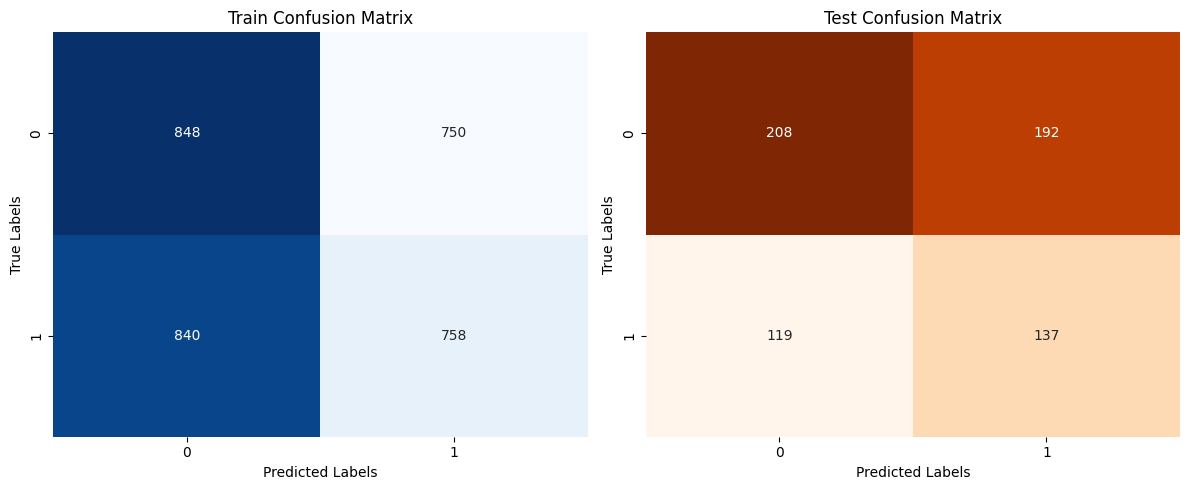

In [23]:
# Extracting the optimal parameters
optimal_parameters = best_results["optimal_parameters"].to_numpy()

# Calculating the predictions for the training and test sets
t_pred_train = (sigmoid(np.dot(X_train, *optimal_parameters)) > 0.5).astype(int)
t_pred_test = (sigmoid(np.dot(X_test, *optimal_parameters)) > 0.5).astype(int)

# Accuracy and F1 score for the training set
print(f"Accuracy on the training set: {accuracy_score(t_train, t_pred_train)}")
print(f"F1 score on the training set: {f1_score(t_train, t_pred_train)}\n")

# Classification report for the training set
print("Classification report for the training set:")
print(classification_report(t_train, t_pred_train))
print()

# Accuracy and F1 score for the test set
print(f"Accuracy on the test set: {accuracy_score(t_test, t_pred_test)}")
print(f"F1 score on the test set: {f1_score(t_test, t_pred_test)}\n")

# Classification report for the test set
print("Classification report for the test set:")
print(classification_report(t_test, t_pred_test))

# Confusion matrix for the training set
cm_train = confusion_matrix(t_train, t_pred_train)

# Confusion matrix for the test set
cm_test = confusion_matrix(t_test, t_pred_test)

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

# Subplot for the training confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Subplot for the test confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

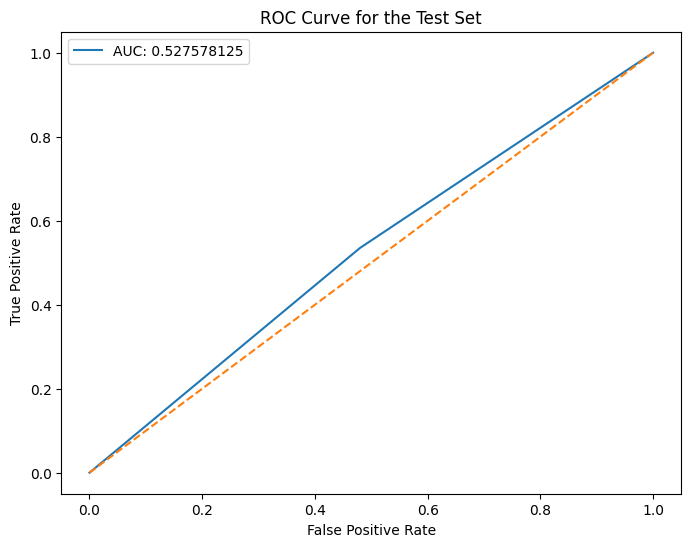

In [24]:
# Calculating the ROC curve for the test set
fpr, tpr, thresholds = roc_curve(t_test, t_pred_test)

# Calculating the AUC for the test set
auc_score = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {auc_score}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve for the Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()